In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing

In [2]:
employee=pd.read_csv(r"D:\DSA - ICT\Week 9\Lark activity\employee.csv")

In [3]:
#Question 1-Load the data into the pandas environment and identify some basic details of the dataset.

In [5]:
employee

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [6]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [7]:
employee.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [8]:
#Question 2 - Reset the index as "name"

In [17]:
emp = employee.set_index("name")
emp

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [13]:
#Question 3 - Select rows for specific names Jack Morgan and Josh wills

In [19]:
emp.loc[['Jack Morgan', 'Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [20]:
#Question 4 -Select data for multiple values "Sales" and “Finance”

In [21]:
emp[emp['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [22]:
#Question 5 - Display employee who has more than 700 performance score.

In [23]:
emp[emp['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [25]:
#Question 6 - Display employee who has more than 500 and less than 700 performance score

In [26]:
emp[(emp['performance_score']>500) & (emp['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [27]:
#Question 7 - Check and handle missing values in the dataset.

In [28]:
emp.isna()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,False,True,True,False,False,False
S Kumar,True,False,False,False,False,False
Jack Morgan,False,False,False,False,False,False
Ying Chin,False,False,False,False,False,False
Dheeraj Patel,False,False,False,False,False,False
Satyam Sharma,True,False,True,False,False,False
James Authur,False,True,False,False,False,False
Josh Wills,False,False,False,False,False,False
Leo Duck,False,False,False,False,False,False


In [30]:
emp.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [32]:
emp.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [33]:
#Float datatype will be filled by Median and String Datatype will be filled by Mode

In [35]:
for i in ['age', 'income']:
    emp[i]=emp[i].fillna(emp[i].median())
emp

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [36]:
emp['gender']=emp['gender'].fillna(emp['gender'].mode()[0])
emp

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [37]:
emp.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [38]:
#Confimed that there are no more null values in the data set

In [39]:
#Question 8 - Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:>

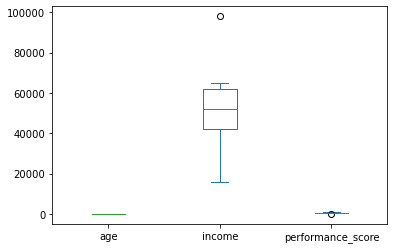

In [42]:
emp.plot(kind='box', vert=True)

In [43]:
#There are outliers in income and Performance score - No outliers in Age

In [51]:
Q1 = np.percentile(emp['performance_score'],25,interpolation = 'midpoint')
Q2 = np.percentile(emp['performance_score'],50,interpolation = 'midpoint')
Q3 = np.percentile(emp['performance_score'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  155.0
Lower limit is 323.5
Upper Limit is 943.5


In [53]:
outlier = []
for x in emp['performance_score']:
    if ((x < lower_limit) or (x > upper_limit)):
        outlier.append(x)
print("Outlier values are",outlier)

Outlier values are [53]


In [55]:
#Index of outlier
index1 = emp['performance_score']<lower_limit
emp.loc[index1].index

Index(['James Authur'], dtype='object', name='name')

In [56]:
#Drop outlier

In [57]:
emp.drop(['James Authur'], inplace=True)

In [58]:
emp

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [60]:
#Question 9 - Check the gender column and do Dummy encoding.

In [61]:
emp["gender"].nunique()

2

In [62]:
pd.get_dummies(emp['gender'])

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


In [63]:
#Question 10 - Do the standard scaling on the feature performance score

In [64]:
emp['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [67]:
re_shape=np.array(emp['performance_score']).reshape(-1, 1)
re_shape

array([[723],
       [520],
       [674],
       [556],
       [711],
       [649],
       [901],
       [709]], dtype=int64)

In [73]:
scaler=preprocessing.StandardScaler()
scaled_perf_score=pd.DataFrame(scaler.fit_transform(re_shape),
                                      columns=['performance_score'],
                                     )
scaled_perf_score

,performance_score
0,0.392262
1,-1.475872
2,-0.058667
3,-1.144578
4,0.281831
5,-0.288733
6,2.030331
7,0.263425


In [75]:
scaled_perf_score.describe()

,performance_score
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
